# ADMET data analysis

Predictions for ~4,500 compounds suggested in the COVID-19 Moonshot compounds were run by a number of parties.
This notebook analyses those predictions and merges them into a single data set.

The datasets provided so far are:
1. Predictions provided by NovaMechanics Ltd through Enalos Suite
2. Predictions provided by Prosilico
3. Predictions provided by L'Istituto Mario Negri IRCCS through VEGA

More info on the COVID-19 Moonshot project is here: https://covid.postera.ai/covid

The source or the compounds analysed here is: https://covid.postera.ai/covid/submissions.csv 

In [31]:
import pandas as pd
import numpy as np

import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

from rdkit.Chem import PandasTools

In [32]:
# Set the default renderer to png as the data is huge and overwhelms the Javascript renderers
pio.renderers.default = 'png'

# Enalos suite predictions from Novamechanics
The predictions are:

- **Cytotoxicity**:  In Silico predictive model that is applied to the small molecules, using any input format, structure, smiles or sdf file,  for the prediction of cytotoxic effect to NIH/3T3 (mouse embryonic fibroblast) cells (5600 small molecules).  The results include the predicted class ("active"/"inactive") and an indication of whether this prediction could be considered reliaςble based on the domain of applicability of the model. Two options are available: The "reliable" option which indicates a prediction within the domain of applicability limits of the model and the "unreliable" option which is a warning for a prediction out of the domain of applicability of the predictive model.
- **MSlogBCF**: Prediction of the BCF, bioconcentration factor which represents the bioaccumulation potential of a chemical. Bioconcentration refers to the process of uptake and build up of chemicals in living organisms.
- **MSlogBP**: Model predicts the Boiling Point using read across predicting modelling. The model was trained with >4000 compounds from the EPA database.
- **MSlogP**: model predicts the octanol/water partition coefficient using read-across. The model is trained with >14K compounds from the PHYSPROP database.
- **MSlogS**: model predicts water solubility using read-across. The model is trained with compounds from the PHYSPROP database.
- **MSlogVP**: Model predicts the Vapor Pressure using read across predicting modelling. The model was trained with >2000 compounds from the EPA database.
- **Mutagenicity**: The model predicts, Ames Mutagenicity potential, the ability of a chemical to cause point mutations in the DNA of the bacterium Salmonella typhimurium. The model was trained with >4000 compounds from the Benchmark Data Set (TU Berlin).

In [33]:
df_enalos = pd.read_csv('data/enalos/moonshot/2_cols.csv.gz')
df_enalos.head()

,SMILES,CID,SMILES.1,InChI,InChIkey,Cytotoxicity_Classification,Cytotoxicity_Prediction,MSlogBCF_Regression,MSlogBCF_Prediction,MSlogBP_Regression,MSlogBP_Prediction,MSlogP_Regression,MSlogP_Prediction,MSlogS_Regression,MSlogS_Prediction,MSlogVP_Regression,MSlogVP_Prediction,Mutagenicity_Classification,Mutagenicity_Prediction
0,CN1CCCC1c1cccnc1,KTA-UNK-dac325de-1,CN2CCCC2(C1=CC=CN=C1),InChI=1S/C10H14N2/c1-12-7-3-5-10(12)9-4-2-6-11...,SNICXCGAKADSCV-UHFFFAOYSA-N,"""inactive""",reliable,0.728082,reliable,257.566669,reliable,1.120923,reliable,0.095526,reliable,-1.658898,reliable,"""negative""",reliable
1,c1ccc2[nH]ccc2c1,KTA-UNK-dac325de-2,C1=CC=C2NC=CC2(=C1),"InChI=1S/C8H7N/c1-2-4-8-7(3-1)5-6-9-8/h1-6,9H",SIKJAQJRHWYJAI-UHFFFAOYSA-N,"""inactive""",reliable,1.380138,reliable,220.691360,reliable,1.617386,reliable,-1.757133,reliable,-1.246492,reliable,"""negative""",reliable
2,c1ccncc1,KTA-UNK-dac325de-3,C1=CC=NC=C1,InChI=1S/C5H5N/c1-2-4-6-5-3-1/h1-5H,JUJWROOIHBZHMG-UHFFFAOYSA-N,"""inactive""",unreliable,0.907922,reliable,113.900873,reliable,0.855636,reliable,-0.274152,reliable,1.357818,reliable,"""negative""",reliable
3,CC(=O)NCCc1c[nH]c2c(CCNS(C)(=O)=O)cc(F)cc12,ELE-IMP-dfb36048-1,CC(=O)NCCC1=CNC2=C(CCNS(C)(=O)=O)C=C(F)C=C12,InChI=1S/C15H20FN3O3S/c1-10(20)17-5-3-12-9-18-...,XNAQQFQHDABOLB-UHFFFAOYSA-N,"""inactive""",reliable,0.531191,reliable,343.527908,reliable,2.094145,reliable,-2.636478,reliable,-10.274020,reliable,"""negative""",reliable
4,CC(=O)NCCc1c[nH]c2c(CCNS(C)(=O)=O)cccc12,ELE-IMP-dfb36048-2,CC(=O)NCCC1=CNC2=C(C=CC=C12)CCNS(C)(=O)=O,InChI=1S/C15H21N3O3S/c1-11(19)16-8-6-13-10-17-...,MTAWMSNRFRVSDK-UHFFFAOYSA-N,"""inactive""",reliable,0.419070,reliable,343.614750,reliable,1.394305,reliable,-2.912230,reliable,-10.340045,reliable,"""negative""",reliable


In [34]:
PandasTools.AddMoleculeColumnToFrame(df_enalos,'SMILES','Molecule')
df_enalos.dtypes

SMILES                          object
CID                             object
SMILES.1                        object
InChI                           object
InChIkey                        object
Cytotoxicity_Classification     object
Cytotoxicity_Prediction         object
MSlogBCF_Regression            float64
MSlogBCF_Prediction             object
MSlogBP_Regression             float64
MSlogBP_Prediction              object
MSlogP_Regression              float64
MSlogP_Prediction               object
MSlogS_Regression              float64
MSlogS_Prediction               object
MSlogVP_Regression             float64
MSlogVP_Prediction              object
Mutagenicity_Classification     object
Mutagenicity_Prediction         object
Molecule                        object
dtype: object

,SMILES,CID,SMILES.1,InChI,InChIkey,Cytotoxicity_Classification,Cytotoxicity_Prediction,MSlogBCF_Regression,MSlogBCF_Prediction,MSlogBP_Regression,MSlogBP_Prediction,MSlogP_Regression,MSlogP_Prediction,MSlogS_Regression,MSlogS_Prediction,MSlogVP_Regression,MSlogVP_Prediction,Mutagenicity_Classification,Mutagenicity_Prediction,Molecule
0,CN1CCCC1c1cccnc1,KTA-UNK-dac325de-1,CN2CCCC2(C1=CC=CN=C1),InChI=1S/C10H14N2/c1-12-7-3-5-10(12)9-4-2-6-11...,SNICXCGAKADSCV-UHFFFAOYSA-N,"""inactive""",reliable,0.728082,reliable,257.566669,reliable,1.120923,reliable,0.095526,reliable,-1.658898,reliable,"""negative""",reliable,
1,c1ccc2[nH]ccc2c1,KTA-UNK-dac325de-2,C1=CC=C2NC=CC2(=C1),"InChI=1S/C8H7N/c1-2-4-8-7(3-1)5-6-9-8/h1-6,9H",SIKJAQJRHWYJAI-UHFFFAOYSA-N,"""inactive""",reliable,1.380138,reliable,220.691360,reliable,1.617386,reliable,-1.757133,reliable,-1.246492,reliable,"""negative""",reliable,
2,c1ccncc1,KTA-UNK-dac325de-3,C1=CC=NC=C1,InChI=1S/C5H5N/c1-2-4-6-5-3-1/h1-5H,JUJWROOIHBZHMG-UHFFFAOYSA-N,"""inactive""",unreliable,0.907922,reliable,113.900873,reliable,0.855636,reliable,-0.274152,reliable,1.357818,reliable,"""negative""",reliable,
3,CC(=O)NCCc1c[nH]c2c(CCNS(C)(=O)=O)cc(F)cc12,ELE-IMP-dfb36048-1,CC(=O)NCCC1=CNC2=C(CCNS(C)(=O)=O)C=C(F)C=C12,InChI=1S/C15H20FN3O3S/c1-10(20)17-5-3-12-9-18-...,XNAQQFQHDABOLB-UHFFFAOYSA-N,"""inactive""",reliable,0.531191,reliable,343.527908,reliable,2.094145,reliable,-2.636478,reliable,-10.274020,reliable,"""negative""",reliable,
4,CC(=O)NCCc1c[nH]c2c(CCNS(C)(=O)=O)cccc12,ELE-IMP-dfb36048-2,CC(=O)NCCC1=CNC2=C(C=CC=C12)CCNS(C)(=O)=O,InChI=1S/C15H21N3O3S/c1-11(19)16-8-6-13-10-17-...,MTAWMSNRFRVSDK-UHFFFAOYSA-N,"""inactive""",reliable,0.419070,reliable,343.614750,reliable,1.394305,reliable,-2.912230,reliable,-10.340045,reliable,"""negative""",reliable,

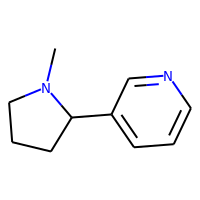
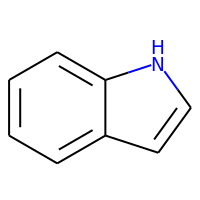
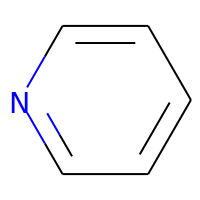
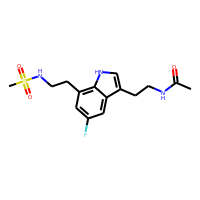
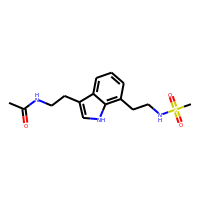

In [35]:
df_enalos.head()

In [36]:
# we have some undefined values
print(df_enalos['Cytotoxicity_Classification'].unique())
print(df_enalos['Cytotoxicity_Prediction'].unique())
print(df_enalos['Mutagenicity_Classification'].unique())
print(df_enalos['Mutagenicity_Prediction'].unique())
print(df_enalos['MSlogBCF_Regression'].unique())
print(df_enalos['MSlogBCF_Prediction'].unique())

['"inactive"' '"active"' nan]
['reliable' 'unreliable' nan]
['"negative"' '"positive"' nan]
['reliable' 'unreliable' nan]
[0.7280818  1.38013789 0.90792227 ... 0.54994279 1.1382139         nan]
['reliable' 'unreliable' nan]


In [37]:
# let's clean this up
df_enalos_cleaned = df_enalos.replace({
    'Cytotoxicity_Classification': np.nan, 
    'Cytotoxicity_Prediction': np.nan,
    'Mutagenicity_Classification': np.nan,
    'Mutagenicity_Prediction': np.nan,
    'MSlogBCF_Prediction': np.nan
}, 'missing')

# and while we're at it remove the " that surround the Cytotoxicity_Classification values
df_enalos_cleaned = df_enalos_cleaned.replace({
    'Cytotoxicity_Classification': '"inactive"', 
}, 'inactive')
df_enalos_cleaned = df_enalos_cleaned.replace({
    'Cytotoxicity_Classification': '"active"', 
}, 'active')

# and the Mutagenicity_Classification
df_enalos_cleaned = df_enalos_cleaned.replace({
    'Mutagenicity_Classification': '"negative"', 
}, 'negative')
df_enalos_cleaned = df_enalos_cleaned.replace({
    'Mutagenicity_Classification': '"positive"', 
}, 'positive')


print(df_enalos_cleaned['Cytotoxicity_Classification'].unique())
print(df_enalos_cleaned['Cytotoxicity_Prediction'].unique())
print(df_enalos_cleaned['Mutagenicity_Classification'].unique())
print(df_enalos_cleaned['Mutagenicity_Prediction'].unique())
print(df_enalos_cleaned['MSlogBCF_Prediction'].unique())

['inactive' 'active' 'missing']
['reliable' 'unreliable' 'missing']
['negative' 'positive' 'missing']
['reliable' 'unreliable' 'missing']
['reliable' 'unreliable' 'missing']


In [38]:
df_enalos_cleaned.shape

(4539, 20)

,SMILES,CID,SMILES.1,InChI,InChIkey,Cytotoxicity_Classification,Cytotoxicity_Prediction,MSlogBCF_Regression,MSlogBCF_Prediction,MSlogBP_Regression,MSlogBP_Prediction,MSlogP_Regression,MSlogP_Prediction,MSlogS_Regression,MSlogS_Prediction,MSlogVP_Regression,MSlogVP_Prediction,Mutagenicity_Classification,Mutagenicity_Prediction,Molecule
0,CN1CCCC1c1cccnc1,KTA-UNK-dac325de-1,CN2CCCC2(C1=CC=CN=C1),InChI=1S/C10H14N2/c1-12-7-3-5-10(12)9-4-2-6-11...,SNICXCGAKADSCV-UHFFFAOYSA-N,inactive,reliable,0.728082,reliable,257.566669,reliable,1.120923,reliable,0.095526,reliable,-1.658898,reliable,negative,reliable,
1,c1ccc2[nH]ccc2c1,KTA-UNK-dac325de-2,C1=CC=C2NC=CC2(=C1),"InChI=1S/C8H7N/c1-2-4-8-7(3-1)5-6-9-8/h1-6,9H",SIKJAQJRHWYJAI-UHFFFAOYSA-N,inactive,reliable,1.380138,reliable,220.691360,reliable,1.617386,reliable,-1.757133,reliable,-1.246492,reliable,negative,reliable,
2,c1ccncc1,KTA-UNK-dac325de-3,C1=CC=NC=C1,InChI=1S/C5H5N/c1-2-4-6-5-3-1/h1-5H,JUJWROOIHBZHMG-UHFFFAOYSA-N,inactive,unreliable,0.907922,reliable,113.900873,reliable,0.855636,reliable,-0.274152,reliable,1.357818,reliable,negative,reliable,
3,CC(=O)NCCc1c[nH]c2c(CCNS(C)(=O)=O)cc(F)cc12,ELE-IMP-dfb36048-1,CC(=O)NCCC1=CNC2=C(CCNS(C)(=O)=O)C=C(F)C=C12,InChI=1S/C15H20FN3O3S/c1-10(20)17-5-3-12-9-18-...,XNAQQFQHDABOLB-UHFFFAOYSA-N,inactive,reliable,0.531191,reliable,343.527908,reliable,2.094145,reliable,-2.636478,reliable,-10.274020,reliable,negative,reliable,
4,CC(=O)NCCc1c[nH]c2c(CCNS(C)(=O)=O)cccc12,ELE-IMP-dfb36048-2,CC(=O)NCCC1=CNC2=C(C=CC=C12)CCNS(C)(=O)=O,InChI=1S/C15H21N3O3S/c1-11(19)16-8-6-13-10-17-...,MTAWMSNRFRVSDK-UHFFFAOYSA-N,inactive,reliable,0.419070,reliable,343.614750,reliable,1.394305,reliable,-2.912230,reliable,-10.340045,reliable,negative,reliable,

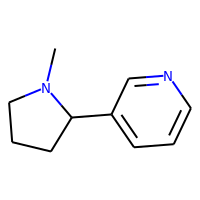
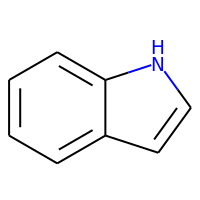
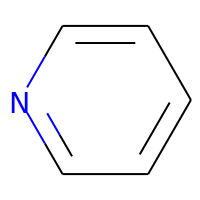
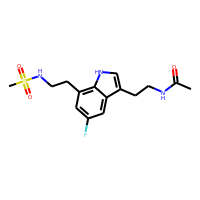
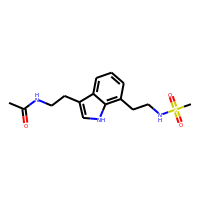

In [39]:
df_enalos_cleaned.head()

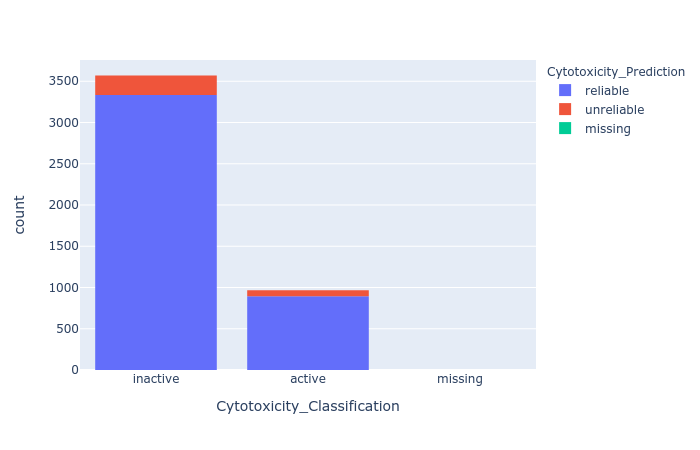

In [40]:
fig = px.histogram(df_enalos_cleaned, x="Cytotoxicity_Classification", color='Cytotoxicity_Prediction')
fig.show()

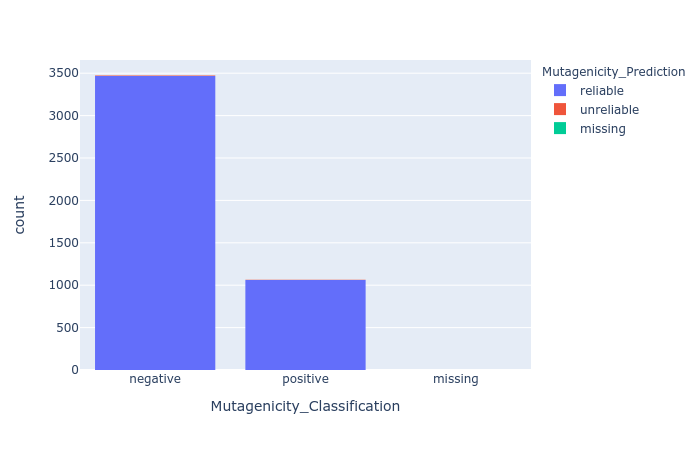

In [41]:
fig = px.histogram(df_enalos_cleaned, x="Mutagenicity_Classification", color='Mutagenicity_Prediction')
fig.show()

In [42]:
filt = df_enalos[df_enalos['MSlogBCF_Regression'] != np.nan]

filt.shape

(4539, 20)

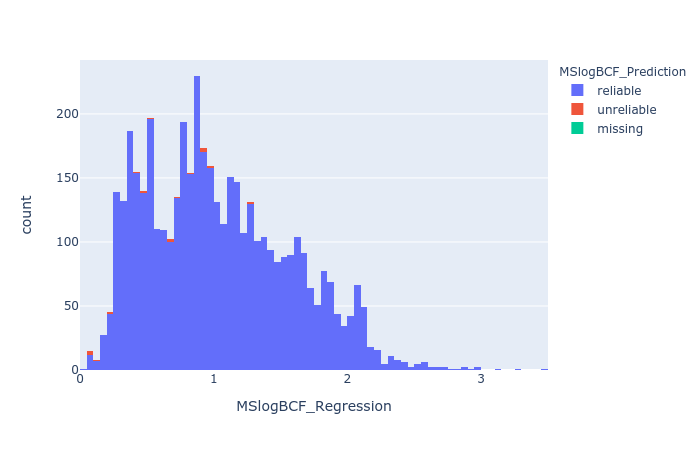

In [43]:
fig = px.histogram(df_enalos_cleaned, x="MSlogBCF_Regression", color='MSlogBCF_Prediction')
fig.show()

# Prosilico data

**Note**: the CID field is missing from this data. In future can it be included?

The fields are:
- **CLint**: Intrinsic hepatic metabolic clearance
- **fdiss**: Maximum in-vivo solubility/dissolution potential
- **fu**: Fraction unbound in human plasma
- **Vss**: Steady-state volume of distribution
- **fabs**: Fraction absorbed

In [44]:
df_prosilico = pd.read_csv('data/prosilico/moonshot/2_cols_predictions.csv.gz')
df_prosilico.head()

,Unnamed: 0,smiles,CLint,CLint.lower,CLint.upper,Vss,Vss.lower,Vss.upper,fabs,fabs.lower,fabs.upper,fdiss,fdiss.lower,fdiss.upper,fu,fu.lower,fu.upper,CLH,F,t2
0,1,CN1CCCC1c1cccnc1,512.861384,43.651583,6165.950019,1.445440,0.574116,3.639150,0.851,0.701,1.0,0.934,0.585,1.28,0.798129,0.261891,0.977604,321.575972,0.624434,3.892551
1,2,c1ccc2[nH]ccc2c1,575.439937,48.977882,6918.309709,1.156911,0.401791,3.334264,0.886,0.754,1.0,0.969,0.635,1.30,0.211689,0.040019,0.635277,112.664712,0.794050,8.892625
2,3,c1ccncc1,512.861384,43.651583,5888.436554,0.912221,0.361410,2.306747,0.850,0.699,1.0,0.961,0.616,1.31,0.545865,0.081832,0.941922,235.921678,0.688375,3.348498
3,4,CC(=O)NCCc1c[nH]c2c(CCNS(C)(=O)=O)cc(F)cc12,512.861384,43.651583,5888.436554,0.942540,0.375837,2.360478,0.857,0.708,1.0,0.939,0.587,1.29,0.557312,0.138997,0.907557,240.077139,0.675926,3.399907
4,5,CC(=O)NCCc1c[nH]c2c(CCNS(C)(=O)=O)cccc12,549.540874,46.773514,6606.934480,0.957414,0.354813,2.582260,0.875,0.737,1.0,0.950,0.604,1.30,0.447238,0.072033,0.893337,211.174415,0.714224,3.926238


In [45]:
PandasTools.AddMoleculeColumnToFrame(df_prosilico,'smiles','Molecule')
df_prosilico.dtypes

Unnamed: 0       int64
smiles          object
CLint          float64
CLint.lower    float64
CLint.upper    float64
Vss            float64
Vss.lower      float64
Vss.upper      float64
fabs           float64
fabs.lower     float64
fabs.upper     float64
fdiss          float64
fdiss.lower    float64
fdiss.upper    float64
fu             float64
fu.lower       float64
fu.upper       float64
CLH            float64
F              float64
t2             float64
Molecule        object
dtype: object

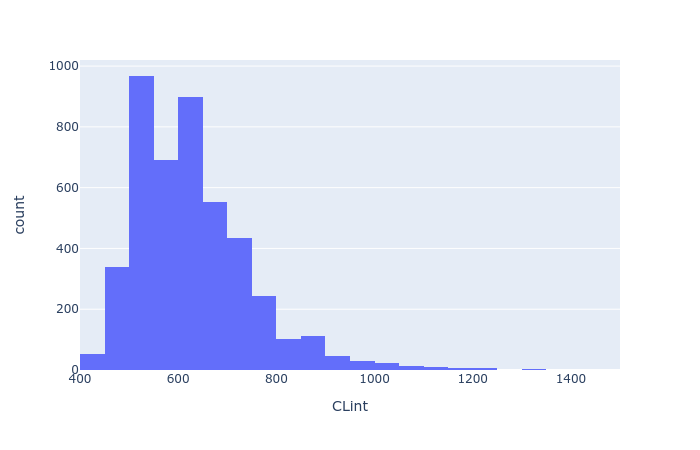

In [46]:
fig = px.histogram(df_prosilico, x="CLint", nbins=50)
fig.show()

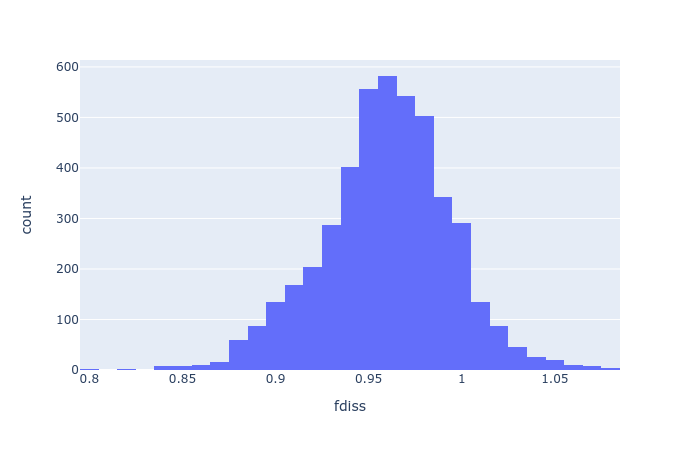

In [47]:
fig = px.histogram(df_prosilico, x="fdiss", nbins=50)
fig.show()

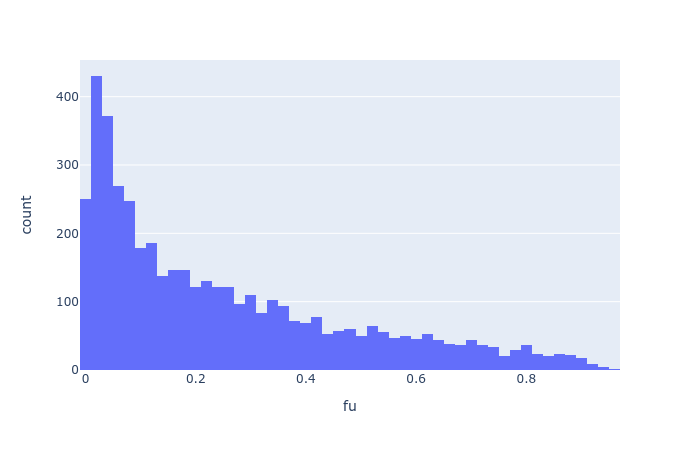

In [48]:
fig = px.histogram(df_prosilico, x="fu", nbins=50)
fig.show()

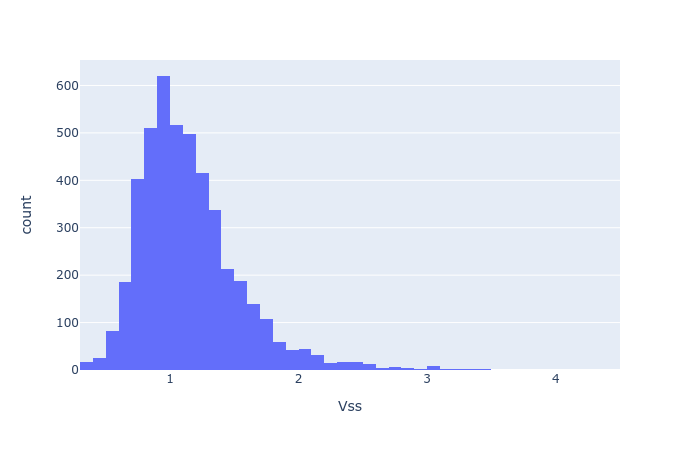

In [49]:
fig = px.histogram(df_prosilico, x="Vss", nbins=50)
fig.show()

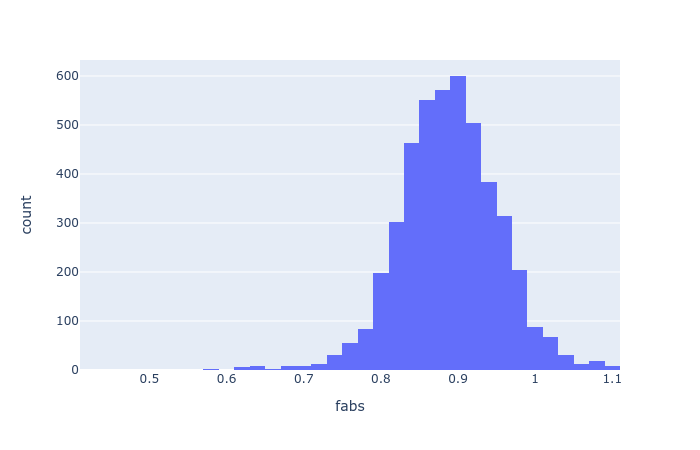

In [50]:
fig = px.histogram(df_prosilico, x="fabs", nbins=50)
fig.show()

# VEGA data from Marionegri

In [51]:
df_vega = pd.read_excel("data/marionegri/moonshot/VEGA_COVID_4539.xlsx")
df_vega.shape

(4539, 26)

In [52]:
df_vega.dtypes

SMILES (Original)                                                          object
CID                                                                        object
SMILES (VEGA)                                                              object
Mutagenicity (Ames test) CONSENSUS model - assessment                      object
Mutagenicity (Ames test) model (CAESAR) - exp.val                          object
Mutagenicity (Ames test) model (SarPy/IRFMN) - exp.val.                    object
Mutagenicity (Ames test) model (ISS) - exp.val.                            object
Mutagenicity (Ames test) model (KNN/Read-Across) - exp.val.                object
Carcinogenicity model (CAESAR) - assessment                                object
Carcinogenicity model (ISS) - assessment                                   object
Carcinogenicity model (IRFMN/Antares) - assessment                         object
Carcinogenicity model (IRFMN/ISSCAN-CGX) - assessment                      object
Carcinogenicity 

In [53]:
df_vega.head()

,SMILES (Original),CID,SMILES (VEGA),Mutagenicity (Ames test) CONSENSUS model - assessment,Mutagenicity (Ames test) model (CAESAR) - exp.val,Mutagenicity (Ames test) model (SarPy/IRFMN) - exp.val.,Mutagenicity (Ames test) model (ISS) - exp.val.,Mutagenicity (Ames test) model (KNN/Read-Across) - exp.val.,Carcinogenicity model (CAESAR) - assessment,Carcinogenicity model (ISS) - assessment,...,Estrogen Receptor-mediated effect (IRFMN/CERAPP) - assessment,Androgen Receptor-mediated effect (IRFMN/COMPARA) - assessment,Skin Sensitization model (CAESAR) - assessment,Skin Sensitization model (IRFMN/JRC) - assessment,Hepatotoxicity model (IRFMN) - assessment,In vitro Micronucleus activity (IRFMN/VERMEER) - assessment,Unnamed: 22,LogP model (Meylan/Kowwin) - assessment,LogP model (MLogP) - assessment,LogP model (ALogP) - assessment
0,CN1CCCC1c1cccnc1,KTA-UNK-dac325de-1,n1cccc(c1)C2N(C)CCC2,NON-Mutagenic (Consensus score: 1),NON-Mutagenic (EXPERIMENTAL value),NON-Mutagenic (EXPERIMENTAL value),NaN,NON-Mutagenic (EXPERIMENTAL value),NON-Carcinogen (EXPERIMENTAL value),NON-Carcinogen (low reliability),...,NON-active (EXPERIMENTAL value),NON-active (EXPERIMENTAL value),Sensitizer (low reliability),Sensitizer (low reliability),Toxic (good reliability),Active (moderate reliability),NaN,1.17 (EXPERIMENTAL value),1.17 (EXPERIMENTAL value),1.17 (EXPERIMENTAL value)
1,c1ccc2[nH]ccc2c1,KTA-UNK-dac325de-2,c1ccc2[nH]ccc2(c1),NON-Mutagenic (Consensus score: 1),NON-Mutagenic (EXPERIMENTAL value),NON-Mutagenic (EXPERIMENTAL value),NaN,NON-Mutagenic (EXPERIMENTAL value),Carcinogen (low reliability),NON-Carcinogen (moderate reliability),...,NON-active (EXPERIMENTAL value),NON-active (EXPERIMENTAL value),Sensitizer (moderate reliability),NON-Sensitizer (low reliability),Unknown,Not predicted (low reliability),NaN,2.14 (EXPERIMENTAL value),2.14 (EXPERIMENTAL value),2.14 (EXPERIMENTAL value)
2,c1ccncc1,KTA-UNK-dac325de-3,n1ccccc1,NON-Mutagenic (Consensus score: 1),NON-Mutagenic (EXPERIMENTAL value),NON-Mutagenic (EXPERIMENTAL value),NON-Mutagenic (EXPERIMENTAL value),NON-Mutagenic (EXPERIMENTAL value),Carcinogen (low reliability),Carcinogen (EXPERIMENTAL value),...,NON-active (good reliability),NON-active (good reliability),Sensitizer (EXPERIMENTAL value),Sensitizer (EXPERIMENTAL value),Toxic (good reliability),Active (moderate reliability),NaN,0.65 (EXPERIMENTAL value),0.65 (EXPERIMENTAL value),0.65 (EXPERIMENTAL value)
3,CC(=O)NCCc1c[nH]c2c(CCNS(C)(=O)=O)cc(F)cc12,ELE-IMP-dfb36048-1,O=C(NCCc2c[nH]c1c2(cc(F)cc1CCNS(=O)(=O)C))C,NON-Mutagenic (Consensus score: 0.5),NaN,NaN,NaN,NaN,NON-Carcinogen (low reliability),NON-Carcinogen (low reliability),...,NON-active (good reliability),NON-active (moderate reliability),NON-Sensitizer (low reliability),Sensitizer (low reliability),NON-Toxic (good reliability),Active (low reliability),NaN,1.14 (moderate reliability),1.43 (moderate reliability),1.53 (low reliability)
4,CC(=O)NCCc1c[nH]c2c(CCNS(C)(=O)=O)cccc12,ELE-IMP-dfb36048-2,O=C(NCCc2c[nH]c1c2(cccc1CCNS(=O)(=O)C))C,NON-Mutagenic (Consensus score: 0.65),NaN,NaN,NaN,NaN,NON-Carcinogen (low reliability),NON-Carcinogen (low reliability),...,NON-active (good reliability),NON-active (good reliability),NON-Sensitizer (low reliability),Sensitizer (moderate reliability),NON-Toxic (good reliability),Not predicted (low reliability),NaN,0.94 (good reliability),1.03 (good reliability),1.32 (low reliability)


**TODO** - Need to work out how to handle this data. Values are combined wiht descriptions or qualifications in the same column. Do we need to parse these out or can the data be provided as separate columns?

# Merging datasets

We use the smiles to merge as the CID is missing from Prosilico data

In [54]:
df_p_tmp = df_prosilico.drop(columns=['Molecule'])
df_merged = pd.merge(df_enalos_cleaned, df_p_tmp, left_on='SMILES', right_on='smiles')
df_merged.shape

(5338, 40)

In [55]:
df_merged.dtypes

SMILES                          object
CID                             object
SMILES.1                        object
InChI                           object
InChIkey                        object
Cytotoxicity_Classification     object
Cytotoxicity_Prediction         object
MSlogBCF_Regression            float64
MSlogBCF_Prediction             object
MSlogBP_Regression             float64
MSlogBP_Prediction              object
MSlogP_Regression              float64
MSlogP_Prediction               object
MSlogS_Regression              float64
MSlogS_Prediction               object
MSlogVP_Regression             float64
MSlogVP_Prediction              object
Mutagenicity_Classification     object
Mutagenicity_Prediction         object
Molecule                        object
Unnamed: 0                       int64
smiles                          object
CLint                          float64
CLint.lower                    float64
CLint.upper                    float64
Vss                      

In [56]:
# This methods provides a simple way to re-order columns.
# See https://towardsdatascience.com/reordering-pandas-dataframe-columns-thumbs-down-on-standard-solutions-1ff0bc2941d5

def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

,SMILES,CID,Molecule,Cytotoxicity_Classification,Cytotoxicity_Prediction,MSlogBCF_Regression,MSlogBCF_Prediction,MSlogBP_Regression,MSlogBP_Prediction,MSlogP_Regression,...,fabs.upper,fdiss,fdiss.lower,fdiss.upper,fu,fu.lower,fu.upper,CLH,F,t2
0,CN1CCCC1c1cccnc1,KTA-UNK-dac325de-1,,inactive,reliable,0.728082,reliable,257.566669,reliable,1.120923,...,1.0,0.934,0.585,1.28,0.798129,0.261891,0.977604,321.575972,0.624434,3.892551
1,c1ccc2[nH]ccc2c1,KTA-UNK-dac325de-2,,inactive,reliable,1.380138,reliable,220.691360,reliable,1.617386,...,1.0,0.969,0.635,1.30,0.211689,0.040019,0.635277,112.664712,0.794050,8.892625
2,c1ccncc1,KTA-UNK-dac325de-3,,inactive,unreliable,0.907922,reliable,113.900873,reliable,0.855636,...,1.0,0.961,0.616,1.31,0.545865,0.081832,0.941922,235.921678,0.688375,3.348498
3,CC(=O)NCCc1c[nH]c2c(CCNS(C)(=O)=O)cc(F)cc12,ELE-IMP-dfb36048-1,,inactive,reliable,0.531191,reliable,343.527908,reliable,2.094145,...,1.0,0.939,0.587,1.29,0.557312,0.138997,0.907557,240.077139,0.675926,3.399907
4,CC(=O)NCCc1c[nH]c2c(CCNS(C)(=O)=O)cc(F)cc12,ELE-IMP-dfb36048-1,,inactive,reliable,0.531191,reliable,343.527908,reliable,2.094145,...,1.0,0.939,0.587,1.29,0.557312,0.138997,0.907557,240.077139,0.675926,3.399907

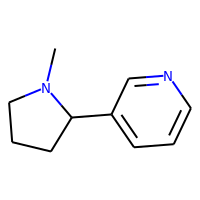
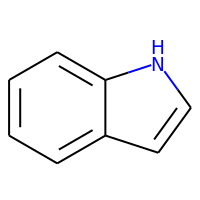
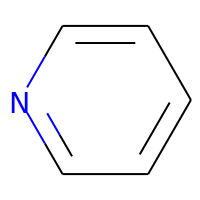
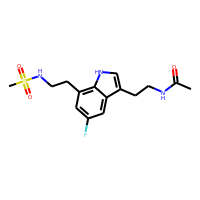
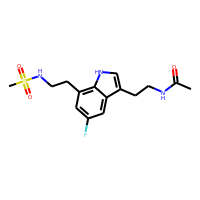

In [57]:
# remove additional SMILES cols
df_merged = df_merged.drop(columns=['SMILES.1','smiles','InChI','InChIkey'])

# Re-order colums to be more friendly
df_merged = movecol(df_merged, 
             cols_to_move=['Molecule'], 
             ref_col='CID',
             place='After')
df_merged.head()